<center> <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. ALEJANDRO MICHEL MARRÓN </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Jun 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/HKael/myst_amm_lab1'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> NAFTRAC Capital Investment  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 6> Abstract </font>

<font color= #6B6B6B> <font size = 4>  
    
#### Investors have two main investment strategies that can be used to generate a return on their investment accounts:<a href='https://www.investopedia.com/ask/answers/040315/what-difference-between-passive-and-active-portfolio-management.asp#:~:text=Active%20portfolio%20management%20focuses%20on,order%20to%20achieve%20similar%20results'> active portfolio management and passive portfolio management.</a> 

- Active portfolio management focuses on outperforming the market in comparison to a specific benchmark such as the Standard & Poor's 500 Index.
- Passive portfolio management mimics the investment holdings of a particular index in order to achieve similar results.

#### In this document, the most optimal way to invest between this two options is explored with a practical case. 
    


<hr style="border:0.02in solid gray"> </hr>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

#### The central premise of this document is the question, "What investment strategy would you propose if your job were to invest 1 million pesos?", which will be simplified in a comparison of two different strategies, passive investment and active investment.

#### In order to make a comparison between a passive investment strategy and an active investment strategy, basic performance attribution measures were considered. Which are the following:

- <a href='https://www.investopedia.com/terms/y/yield.asp'>Monthly yield</a>
- <a href='https://www.investopedia.com/terms/c/cumulativereturn.asp'>Cumulative monthly return</a>
- <a href='https://www.investopedia.com/terms/s/sharperatio.asp'>Sharpe ratio</a>

#### The question will be answered through an applied problem, which is the following:

You have 1 million pesos, you have two options to invest them. On the one hand, you can make a Passive Investment of the capital, buying 100% of the capital of securities of an ETF that replicates the Mexican equity market S & P / BMV IPC, which is the NAFTRAC. But on the other hand, you can make an Active Capital Investment, by creating a portfolio that has the same assets as the ETF and rebalancing through a specific algorithm.

iShares NAFTRAC ISHRS is an exchange traded fund (ETF) incorporated in Mexico. The Fund aims to hold all the common stocks of the Mexican Stock Exchange (IPC) Index, and is intended to replicate investment results that generally correspond to the price and yield performance of the MEXBOL (IPC) Index.

The passive investment strategy is divided in two periods:
- Pre-pandemic: 01-31-2018 to 01-31-2020
- In-pandemic: 02-28-2020 to 02-28-2021

While the active investment strategy is composed by one period only:
- 31-01-2018 hasta 28-02-2021

More specific data will be presented throughout the following document.
    

    

<hr style="border:0.02in solid gray"> </hr>

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

### Below you'll find available the packages and dependencies used in the making and running of the notebook.

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime 
import time
import functions as fn
import data 
import matplotlib.pyplot as plt
import main
pd.set_option('display.float_format', '{:.4f}'.format)
from main import df_pasiva_a
from main import df_pasiva_b
from main import df_activa
from main import dates
from main import global_tickers
from main import global_prices
from main import precios
from data import files
from data import data_files
from data import data
from data import initialdata
from plotly.offline import iplot   
import plotly.graph_objects as go

['2018-01-31', '2018-02-28', '2018-03-28', '2018-04-30']
['31-01-2018', '28-02-2018', '28-03-2018', '30-04-2018']
['AC.MX', 'ALFAA.MX', 'ALPEKA.MX', 'ALSEA.MX']
[*********************100%***********************]  39 of 39 completed

1 Failed download:
-  .MX: No data found, symbol may be delisted


<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Python Packages </font> <font color= #555555>

<hr style="border:0.02in solid gray"> </hr>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas 
- numpy
- jupyter
- yfinance 
- datetime
- time
- pandas_datareader
- plotly

## <font color= #6B6B6B> 2.2 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/a/precios.csv : Precios históricos prepandemia
- files/b/precios.csv : Precios históricos postpandemia


<hr style="border:0.02in solid gray"> </hr>

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

#### In this segment the data used to build the investment strategies is shown and described.

#### First we have the files that were used, this are historical data records of the NAFTRAC. Downloaded monthly to build the passive strategy. 

In [ ]:
print(files)

#### There are 39 files taken into account, according to the period previously established in the introduction.

In [ ]:
len(data_files)

In [ ]:
print(dates)

#### Below the tickers of the individual common stocks of the Mexican Stock Exchange, which the NAFTRAC is composed of, are shown.

In [ ]:
print(global_tickers)

#### The weight, price, value and some more characteristics each individual stock are shown below. Describing the data that will be used.

In [ ]:
data.head()

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 4. Passive investing </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> Passive portfolio management is also referred to as index fund management.

<font color= #6B6B6B>The portfolio is designed to parallel the returns of a particular market index or benchmark as closely as possible. For example, each stock listed on an index is weighted. That is, it represents a percentage of the index that is commensurate with its size and influence in the real world. The creator of an index portfolio will use the same weights.

<font color= #6B6B6B>The purpose of passive portfolio management is to generate a return that is the same as the chosen index.

<font color= #6B6B6B>A passive strategy does not have a management team making investment decisions and can be structured as an exchange-traded fund (ETF), a mutual fund, or a unit investment trust.
    

##### The following conditions were implemented:

- An ETF, NAFTRAC, which represents the S & P / BMV IPC, is used as a reference.
- Only buy operations (long position) are allowed.
- The operations are executed at the market price and a single purchase or sale price is considered for all the securities in the operation.
- Initial capital of 1 million pesos.
- The weights of the first file were used.
- No rebalances during the entire analysis period.
- In all the months (files) the % of capital indicated for KOFL.MX, KOFUBL.MX, USD.MXN, BSMXB.MX, NMKA.MX were eliminated from the historical positions and considered it as CASH.

In [ ]:
initialdata["Peso (%)"].describe()

In [ ]:
# basic plotly plot
data = [go.Bar(x=initialdata["Ticker"], y=data["Peso (%)"])]
# instruction to view it inside jupyter
iplot(data)

In [ ]:
# PASIVA 1
df_pasiva_a

In [ ]:
df_pasiva_a.describe()

#### Overall we see a negative mean yield, relatively small, less than 1% with a ~4% STD, not a volatile portfolio. We can infer it is successfully accomplishing its purpose with this low volatility.

In [ ]:
# basic plotly plot
data = [go.Bar(x=df_pasiva_a.index, y=df_pasiva_a.Rendimiento)]
# instruction to view it inside jupyter
iplot(data)

In [ ]:
# PASIVA 2
df_pasiva_b

In [ ]:
df_pasiva_b.describe()

#### Overall we see a positive mean yield, relatively small, more than 2%, with a ~6% STD, not a volatile portfolio. We can infer it is successfully accomplishing its purpose with this low volatility.


#### It is interesting to note that during the pandemic, when the economy is supposedly at its worse, it started to follow a positive trend.

In [ ]:
# basic plotly plot
data = [go.Bar(x=df_pasiva_b.index, y=df_pasiva_b.Rendimiento)]
# instruction to view it inside jupyter
iplot(data)

#### Overall we can visually see that while the returns overall were not all that positive it maintained its value relatively well.

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 5. Active investment </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B>  The investor who follows an active portfolio management strategy buys and sells stocks in an attempt to outperform a specific index, such as the Standard & Poor's 500 Index or the Russell 1000 Index. In this particular case de iShare NAFTRAC.

<font color= #6B6B6B>  An actively managed investment fund has an individual portfolio manager, co-managers, or a team of managers all making investment decisions for the fund. The success of the fund depends on in-depth research, market forecasting, and the expertise of the management team.

<font color= #6B6B6B>  Portfolio managers engaged in active investing follow market trends, shifts in the economy, changes to the political landscape, and any other factors that may affect specific companies. This data is used to time the purchase or sale of assets.

##### The following conditions and considerations were implemented:

- An ETF, NAFTRAC, which represents the S & P / BMV IPC, is used as a reference.
- The commissions to be paid for each rebalancing are considered = 0.00125 of the value of the operation (securities * price * commission).
- Only buy operations (long position) are allowed.
- The operations are executed at the market price and a single purchase or sale price is considered for all the securities in the operation.
- Initial capital of 1 million pesos.
- The weights of the first file were used.
- No rebalances during the entire analysis period.
- In all the months (files) the % of capital indicated for KOFL.MX, KOFUBL.MX, USD.MXN, BSMXB.MX, NMKA.MX were eliminated from the historical positions and considered it as CASH.
- With the capital that IS NOT CASH, an efficient portfolio was built, maximizing the standard sharpe, starting from 02-28-2020 and using daily logarithmic returns until 01-31-2018
- As of the next month immediately on 02-28-2020, rebalance, with daily prices, using the following rule:
- Decrease by 2.5% the position in securities of those assets whose price decreased by 5% or more
- Increase by 2.5% the position in securities of those assets whose price increased by 5% or more
- The same rebalancing fees for each position change with each asset as applicable were paid.
- The buyback order will be the asset with the highest growth the day immediately before



# Sharpe Ratio


<font color= #6B6B6B>The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

<font color= #6B6B6B>Subtracting the risk-free rate from the mean return allows an investor to better isolate the profits associated with risk-taking activities. The risk-free rate of return is the return on an investment with zero risk, meaning it's the return investors could expect for taking no risk. The yield for a U.S. Treasury bond, for example, could be used as the risk-free rate.

<font color= #6B6B6B>Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

<center>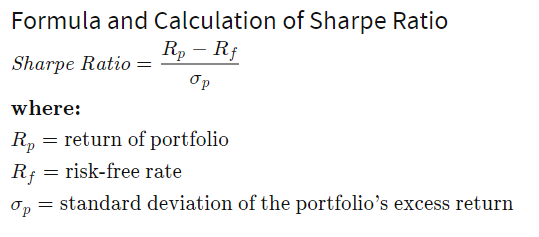

In [ ]:
df_activa.head(4)

In [ ]:
df_activa.tail(4)

In [ ]:
df_activa["Capital"].describe()

In [ ]:
# basic plotly plot
data = [go.Bar(x=df_activa.index, y=df_activa.Rendimiento)]
# instruction to view it inside jupyter
iplot(data)

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 6. Historical Operation Registry </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 7. Performance Attribution Measures </font>

<br>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 6> 8. References </font>

<hr style="border:0.02in solid gray"> </hr>

-[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

-JAMES CHEN. (2021). Yield. 06-06-2021, de Investopedia Sitio web: https://www.investopedia.com/terms/y/yield.asp

-NICK LIOUDIS. (2020). Passive vs. Active Portfolio Management: What's the Difference?. 06-06-2021, de Investopedia Sitio web: https://www.investopedia.com/ask/answers/040315/what-difference-between-passive-and-active-portfolio-management.asp

-JASON FERNANDO. (2021). Sharpe Ratio. 06-06-2021, de Investopedia Sitio web: https://www.investopedia.com/terms/s/sharperatio.asp

<hr style="border:0.02in solid gray"> </hr>

<br>